Check `md5`, `sha1` and record `file magic type`, `runnable` as well.

### File hash functions
- https://stackoverflow.com/questions/22058048/hashing-a-file-in-python
- https://stackoverflow.com/questions/3431825/generating-an-md5-checksum-of-a-file

In [5]:
import hashlib

filePath = '../惡意程式樣本與清冊/202207_malware_sample/20227_1_Xorddos/0aefb67c01a24d05351b093455203fa2.bin'

In [ ]:
def md5(fname):
    hash_md5 = hashlib.md5()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

md5(filePath)

In [ ]:
def sha256(fname):
    hash = hashlib.sha256()
    with open(fname, "rb") as f:
        bytes = f.read() # read entire file as bytes
        readable_hash = hashlib.sha256(bytes).hexdigest()
    return readable_hash
    #     for chunk in iter(lambda: f.read(4096), b""):
    #         hash.update(chunk)
    # return hash.hexdigest()

sha256(filePath)

### Magic type function
- https://stackoverflow.com/questions/1974724/is-there-a-python-equivalent-of-the-unix-file-utility
- https://github.com/Yelp/elastalert/issues/1927

In [1]:
! pip install python-magic-bin==0.4.14

     ------------------------------------ 409.3/409.3 kB 543.7 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import magic
def getMagic(fname):
    return magic.from_buffer(open(fname, "rb").read(2048))

getMagic(filePath)

### Collecting information

In [18]:
import glob
import os
rootFolder = "../惡意程式樣本與清冊/202207_malware_sample"
sampleRootFolder = glob.glob(os.path.join(rootFolder, "*")) # [x[0] for x in os.walk(rootFolder)] # same as
print(sampleRootFolder)

def escape(path) -> bool:
    escape_list = ["20227_","奇怪的樣本"]
    for e in escape_list:
        if path.find(e) != -1:
            return True
    return False

data_list = []
for familyFolder in sampleRootFolder:
    if escape(familyFolder):
        continue
    sampleFiles = glob.glob(os.path.join(familyFolder, "*"))
    # file is full filepath
    for file in sampleFiles:
        data = {}
        # data['family'] = familyFolder.split('_')[-1]
        data['family'] = familyFolder.split('\\')[-1]
        data['filename'] = file.split('\\')[-1]
        data['md5'] = md5(file)
        data['sha256'] = sha256(file)
        m = getMagic(file)
        data['magic'] = m
        if m.find('ARM') != -1:
            data['platform'] = 'ARM'
        elif m.find('MIPS') != -1:
            data['platform'] = 'MIPS'
        elif m.find('Intel') != -1:
            data['platform'] = 'X86'
        elif m.find('64-bit') != -1:
            data['platform'] = 'X86_64'
        else:
            data['platform'] = 'none' # not executable
        data_list.append(data)
print('num of samples:', len(data_list))

['../惡意程式樣本與清冊/202207_malware_sample\\20227_1_Xorddos', '../惡意程式樣本與清冊/202207_malware_sample\\20227_2_Mozi', '../惡意程式樣本與清冊/202207_malware_sample\\20227_3_Mirai', '../惡意程式樣本與清冊/202207_malware_sample\\20227_4_Dofloo', '../惡意程式樣本與清冊/202207_malware_sample\\20227_5_Tsunami', '../惡意程式樣本與清冊/202207_malware_sample\\Adm', '../惡意程式樣本與清冊/202207_malware_sample\\Adore', '../惡意程式樣本與清冊/202207_malware_sample\\BASHLITE', '../惡意程式樣本與清冊/202207_malware_sample\\Binom', '../惡意程式樣本與清冊/202207_malware_sample\\Bliss', '../惡意程式樣本與清冊/202207_malware_sample\\Brundle', '../惡意程式樣本與清冊/202207_malware_sample\\Cephei', '../惡意程式樣本與清冊/202207_malware_sample\\Cheese', '../惡意程式樣本與清冊/202207_malware_sample\\Coin', '../惡意程式樣本與清冊/202207_malware_sample\\Darlloz', '../惡意程式樣本與清冊/202207_malware_sample\\Devnull', '../惡意程式樣本與清冊/202207_malware_sample\\GafGyt', '../惡意程式樣本與清冊/202207_malware_sample\\Hydra', '../惡意程式樣本與清冊/202207_malware_sample\\Kaiten', '../惡意程式樣本與清冊/202207_malware_sample\\Lion', '../惡意程式樣本與清冊/202207_malware_sample\\LuaBot', 

In [19]:
import pandas as pd
df = pd.DataFrame(data=data_list)
df.to_csv('sample_info_new.csv', index=False)

In [20]:
df.head(2)

,family,filename,md5,sha256,magic,platform
0,Adm,34c382e5bedf0952de37fbe48e291731.bin,34c382e5bedf0952de37fbe48e291731,67a2f35f9651ff34a5cb554e376cb33e7ba2be9e74c457...,RPM v3.0 src,none
1,Adm,4459f90ced4401138f468c75ac0203bb.bin,4459f90ced4401138f468c75ac0203bb,cc08471216c49989702fa152c6af99bd425d80f40b16de...,"ELF 64-bit LSB executable, x86-64, version 1 (...",X86_64


### 分析結果
1. 惡意程式能否執行? 只有 X86, X86_64, ARM 能被執行，MIPS 與其餘皆無法。注意即使能順利執行，也不保證不被 kill by singal。

ref: https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots

[Text(0, 0, '17'),
 Text(0, 0, '20'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '34')]

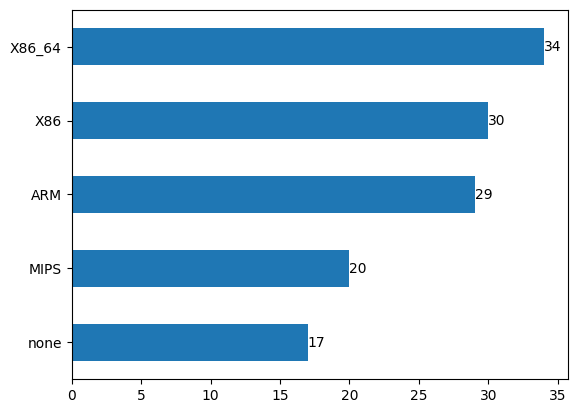

In [21]:
# df['platform']
ax = df.platform.value_counts().sort_values().plot(kind = 'barh')
ax.bar_label(ax.containers[0])

In [22]:
print(df.family.unique())

chart_data = {'executable':[], 'non-executable':[]}
for family in df.family.unique():
    f_df = df[df.family == family]
    executable_cnt = len(f_df[f_df.platform.isin(['X86_64','X86','ARM'])])
    non_executable_cnt = len(f_df[~f_df.platform.isin(['X86_64','X86','ARM'])])
    chart_data['executable'].append(executable_cnt)
    chart_data['non-executable'].append(non_executable_cnt)
    # non_executable_cnt = f_df[f_df.platform in ['MIPS','none']]
chart_data

['Adm' 'Adore' 'BASHLITE' 'Binom' 'Bliss' 'Brundle' 'Cephei' 'Cheese'
 'Coin' 'Darlloz' 'Devnull' 'GafGyt' 'Hydra' 'Kaiten' 'Lion' 'LuaBot'
 'Lupper' 'Mayhem' 'Millen' 'Nuxbee' 'NyaDrop' 'PNScan' 'Remaiten' 'Rexob'
 'Snakso' 'Turla' 'Winter' 'Zariche']


{'executable': [4,
  10,
  5,
  3,
  3,
  1,
  5,
  1,
  7,
  3,
  0,
  2,
  0,
  10,
  4,
  2,
  2,
  3,
  1,
  1,
  10,
  1,
  1,
  1,
  1,
  6,
  1,
  5],
 'non-executable': [2,
  0,
  4,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  2,
  6,
  1,
  0,
  2,
  1,
  0,
  0,
  0,
  1,
  0,
  9,
  4,
  1,
  0,
  0,
  2,
  0]}

In [23]:
pd.DataFrame(chart_data, index=df.family.unique())

,executable,non-executable
Adm,4,2
Adore,10,0
BASHLITE,5,4
Binom,3,0
Bliss,3,0
Brundle,1,0
Cephei,5,0
Cheese,1,1
Coin,7,0
Darlloz,3,1


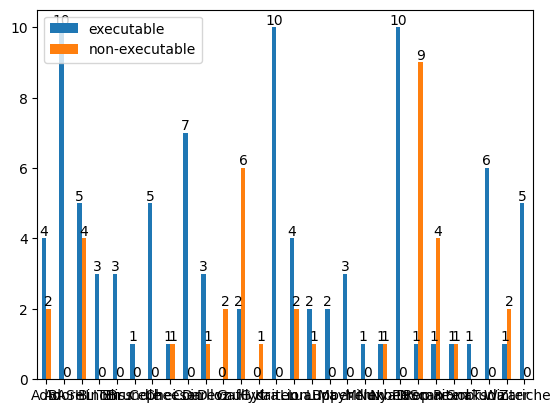

In [24]:
ax = pd.DataFrame(chart_data, index=df.family.unique()).plot.bar(rot=0)
for container in ax.containers:
    ax.bar_label(container)

更新 `sample_info.csv` 後的數據。

In [2]:
# must >= 3.4.0 to draw bar_label
! conda list matplotlib

# packages in environment at C:\Users\Weber\miniconda3:
#
# Name                    Version                   Build  Channel
matplotlib                3.5.2            py39haa95532_0  
matplotlib-base           3.5.2            py39h581301d_1    conda-forge
matplotlib-inline         0.1.2              pyhd3eb1b0_2  


chart_data {'executable': [9, 2, 10, 3, 1, 4, 13, 1, 2, 2, 4, 6, 10, 3, 2, 2, 18, 5, 5, 4, 21]}


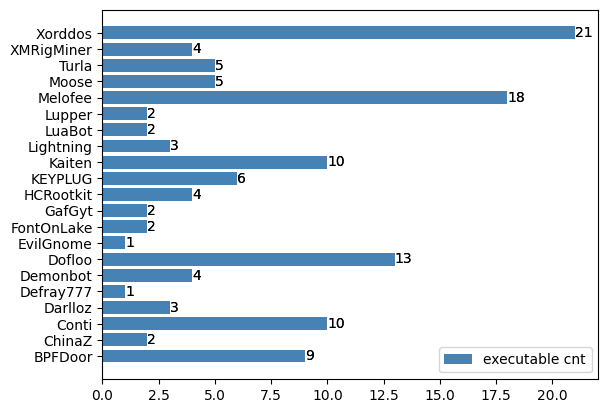

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('sample_info_new.csv')
# print(df.family.unique())

family_names = ["Dofloo", "Xorddos", "Darlloz", "Lupper", "GafGyt", "LuaBot", "Kaiten", "Turla"]
family_names.extend(['BPFDoor', 'Conti', 'ChinaZ', 'Defray777', 'Demonbot', 'EvilGnome', 'FontOnLake', 'HCRootkit', 'KEYPLUG', 'Lightning', 'Melofee','Moose','XMRigMiner'])
family_names.sort()
chart_data = {'executable':[], } # 'non-executable':[]
used_family = []

for family in family_names:
    f_df = df[df.family == family]
    executable_cnt = len(f_df[f_df.platform.isin(['X86_64','X86','ARM'])])
    non_executable_cnt = len(f_df[~f_df.platform.isin(['X86_64','X86','ARM'])])
    # print(family, executable_cnt)
    used_family.append(family)
    chart_data['executable'].append(executable_cnt)
    # chart_data['non-executable'].append(non_executable_cnt)
    # non_executable_cnt = f_df[f_df.platform in ['MIPS','none']]
# chart_data['non-executable'] = [0]*len(chart_data['non-executable'])
print('chart_data', chart_data)
print('sum', sum(chart_data['executable']))

pd.DataFrame(chart_data, index=used_family)

# ax = pd.DataFrame(chart_data, index=used_family).plot.bar(rot=-45)
# for container in ax.containers:
#     ax.bar_label(container)
fig, ax = plt.subplots()
bars = ax.barh(used_family, chart_data['executable'], color = 'steelblue', label='executable cnt')

ax.legend()
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

2. hash值使否與檔名吻合? Ans: 通通吻合。

In [77]:
df.columns

Index(['family', 'filename', 'md5', 'sha256', 'magic', 'platform'], dtype='object')

In [81]:
for idx, row in df.iterrows():
    try:
        fname = row.filename.split('.')[0]
    except:
        fname = row.filename
    if fname not in [row.md5, row.sha256]:
        print(row.filename)